In [43]:
# Import Libraries
import pandas as pd
# We will commonly use pandas to handle dataframes, which is a crucial library for handling datasets in ML tasks.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings

from pickle import dump

In [44]:
# import dataset(s)
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", sep = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


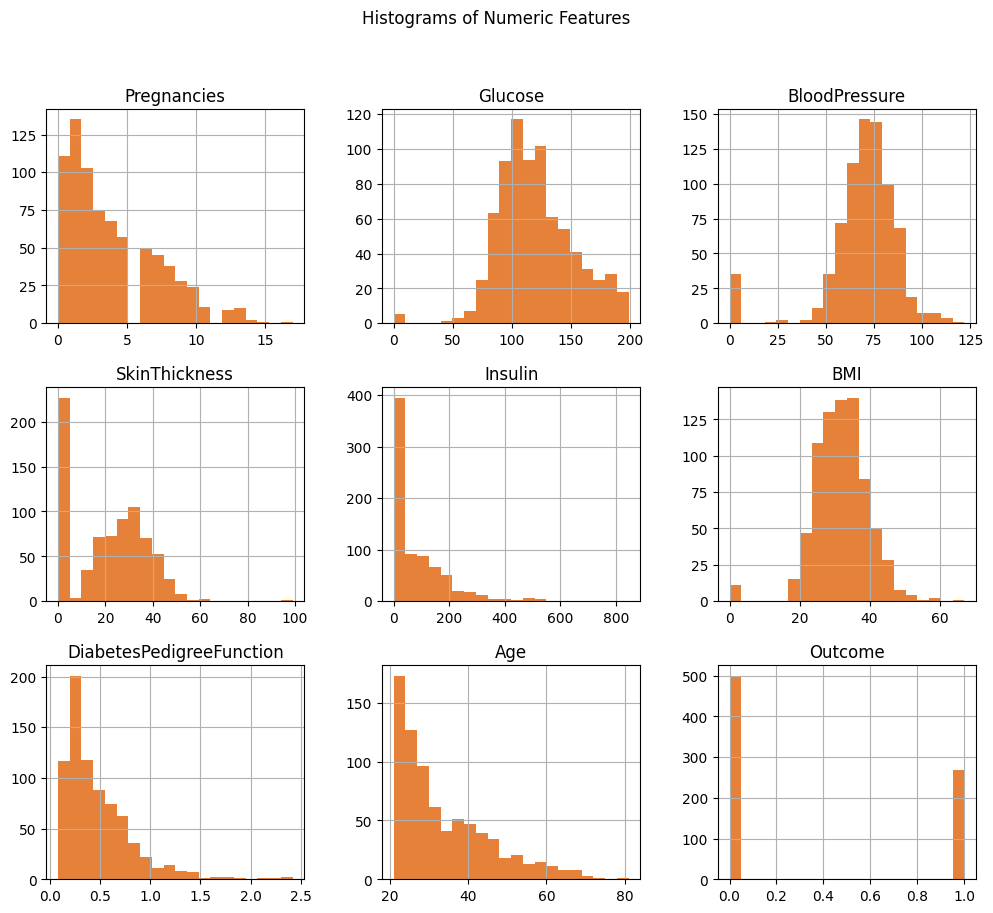

In [46]:
# Plot histograms for each numeric feature
df.hist(figsize=(12, 10), bins=20, color="#E58139")
plt.suptitle("Histograms of Numeric Features")
plt.show()

In [47]:
# Splitting data into features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest for feature selection, choosing top 7 features
kbest_selector = SelectKBest(k=7)
X_train_sel = pd.DataFrame(kbest_selector.fit_transform(X_train, y_train), columns=X_train.columns[kbest_selector.get_support()])

# Apply the same transformation to the test set
X_test_sel = pd.DataFrame(kbest_selector.transform(X_test), columns=X_train.columns[kbest_selector.get_support()])

# Display the first few rows of the selected features
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [48]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [49]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/clean_train.csv", index = False)
X_test_sel.to_csv("../data/clean_test.csv", index = False)

In [50]:
train_data = pd.read_csv("../data/clean_train.csv")
test_data = pd.read_csv("../data/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


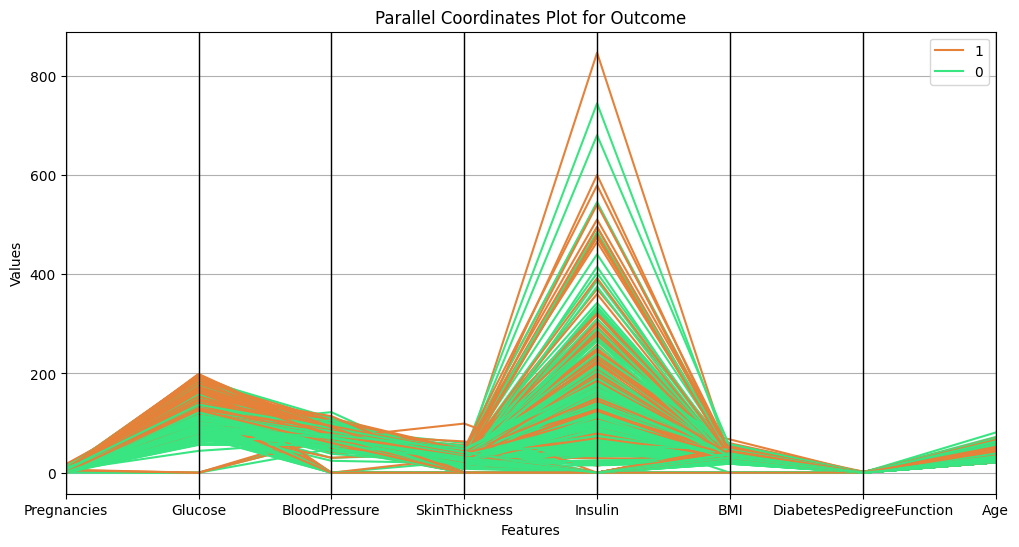

In [51]:
plt.figure(figsize=(12, 6))
plt.title("Parallel Coordinates Plot for Outcome")

# Parallel coordinates plot using df and custom color palette
pd.plotting.parallel_coordinates(df, "Outcome", color=("#E58139", "#39E581", "#8139E5"))

# Adding axis labels and grid for clarity
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)

plt.show()

In [52]:
# General info about the dataset
print("Train Data Overview")
train_data.info()

# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())

# Basic statistics summary of the dataset
print("\nSummary Statistics:")
print(train_data.describe())

Train Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   Insulin                   614 non-null    float64
 4   BMI                       614 non-null    float64
 5   DiabetesPedigreeFunction  614 non-null    float64
 6   Age                       614 non-null    float64
 7   Outcome                   614 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 38.5 KB

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summ

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


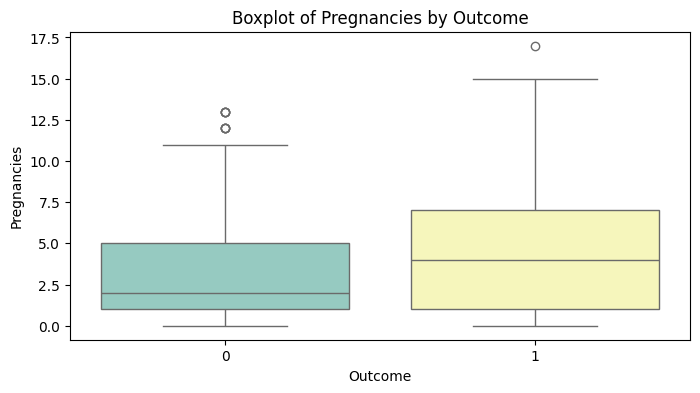

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


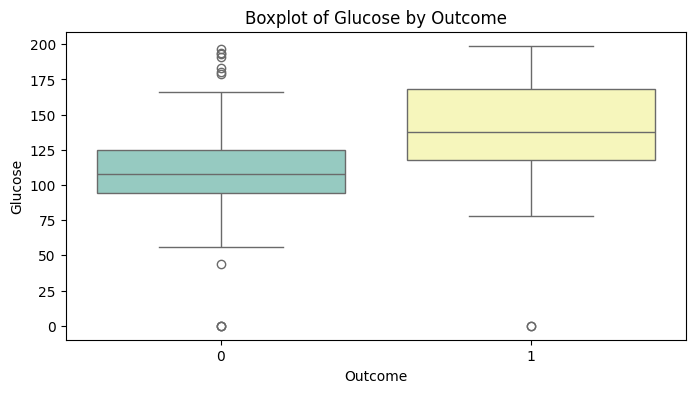

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


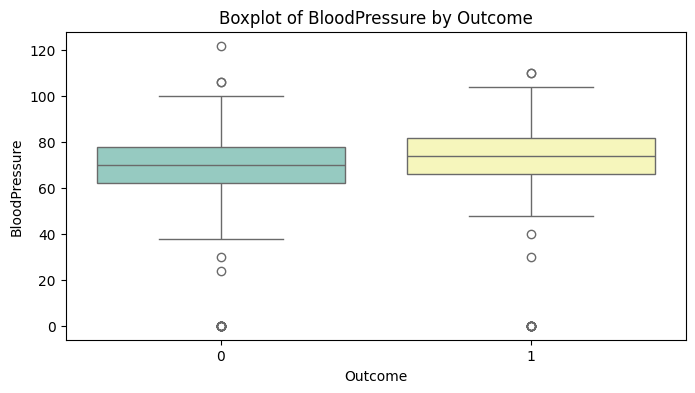

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


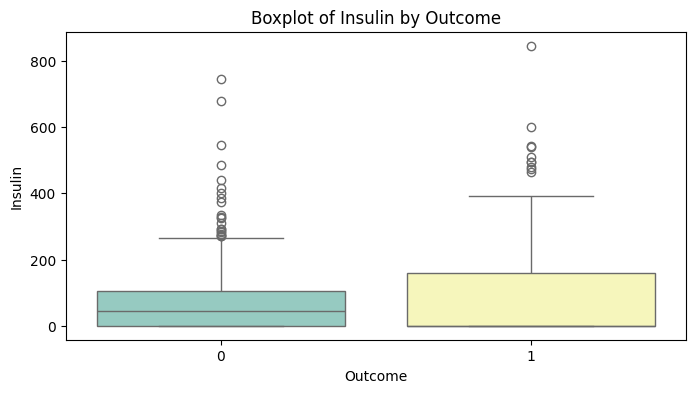

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


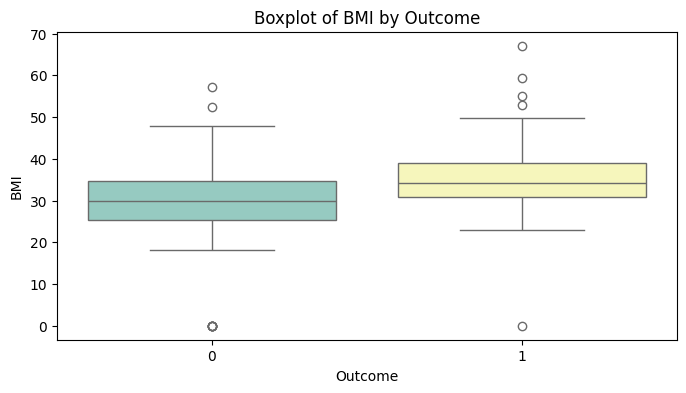

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


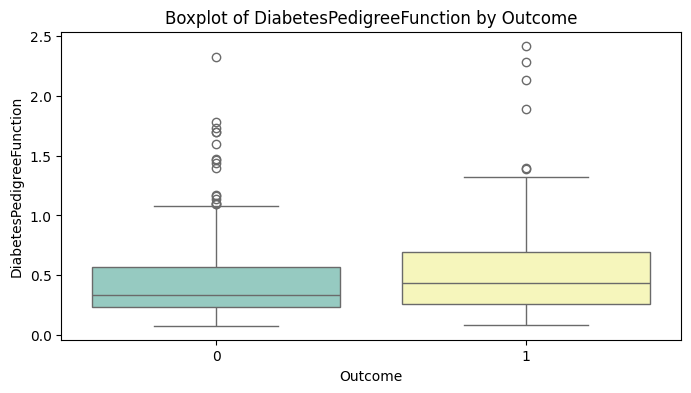

/tmp/ipykernel_2824/721345973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")


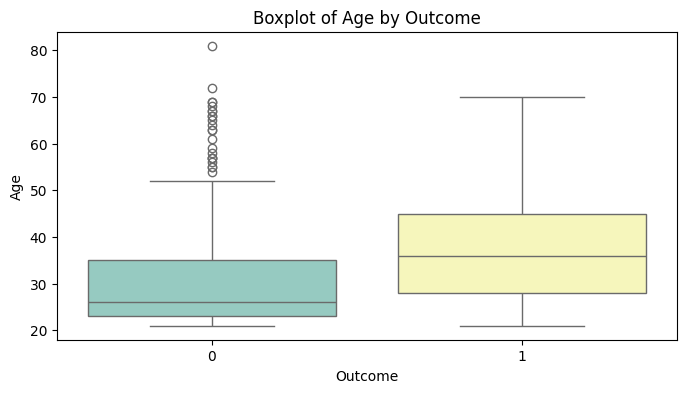

In [53]:
# Box plots of numeric features grouped by the target variable 'Outcome'
for column in train_data.drop(columns='Outcome').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=train_data, palette="Set3")
    plt.title(f'Boxplot of {column} by Outcome')
    plt.show()

In [54]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

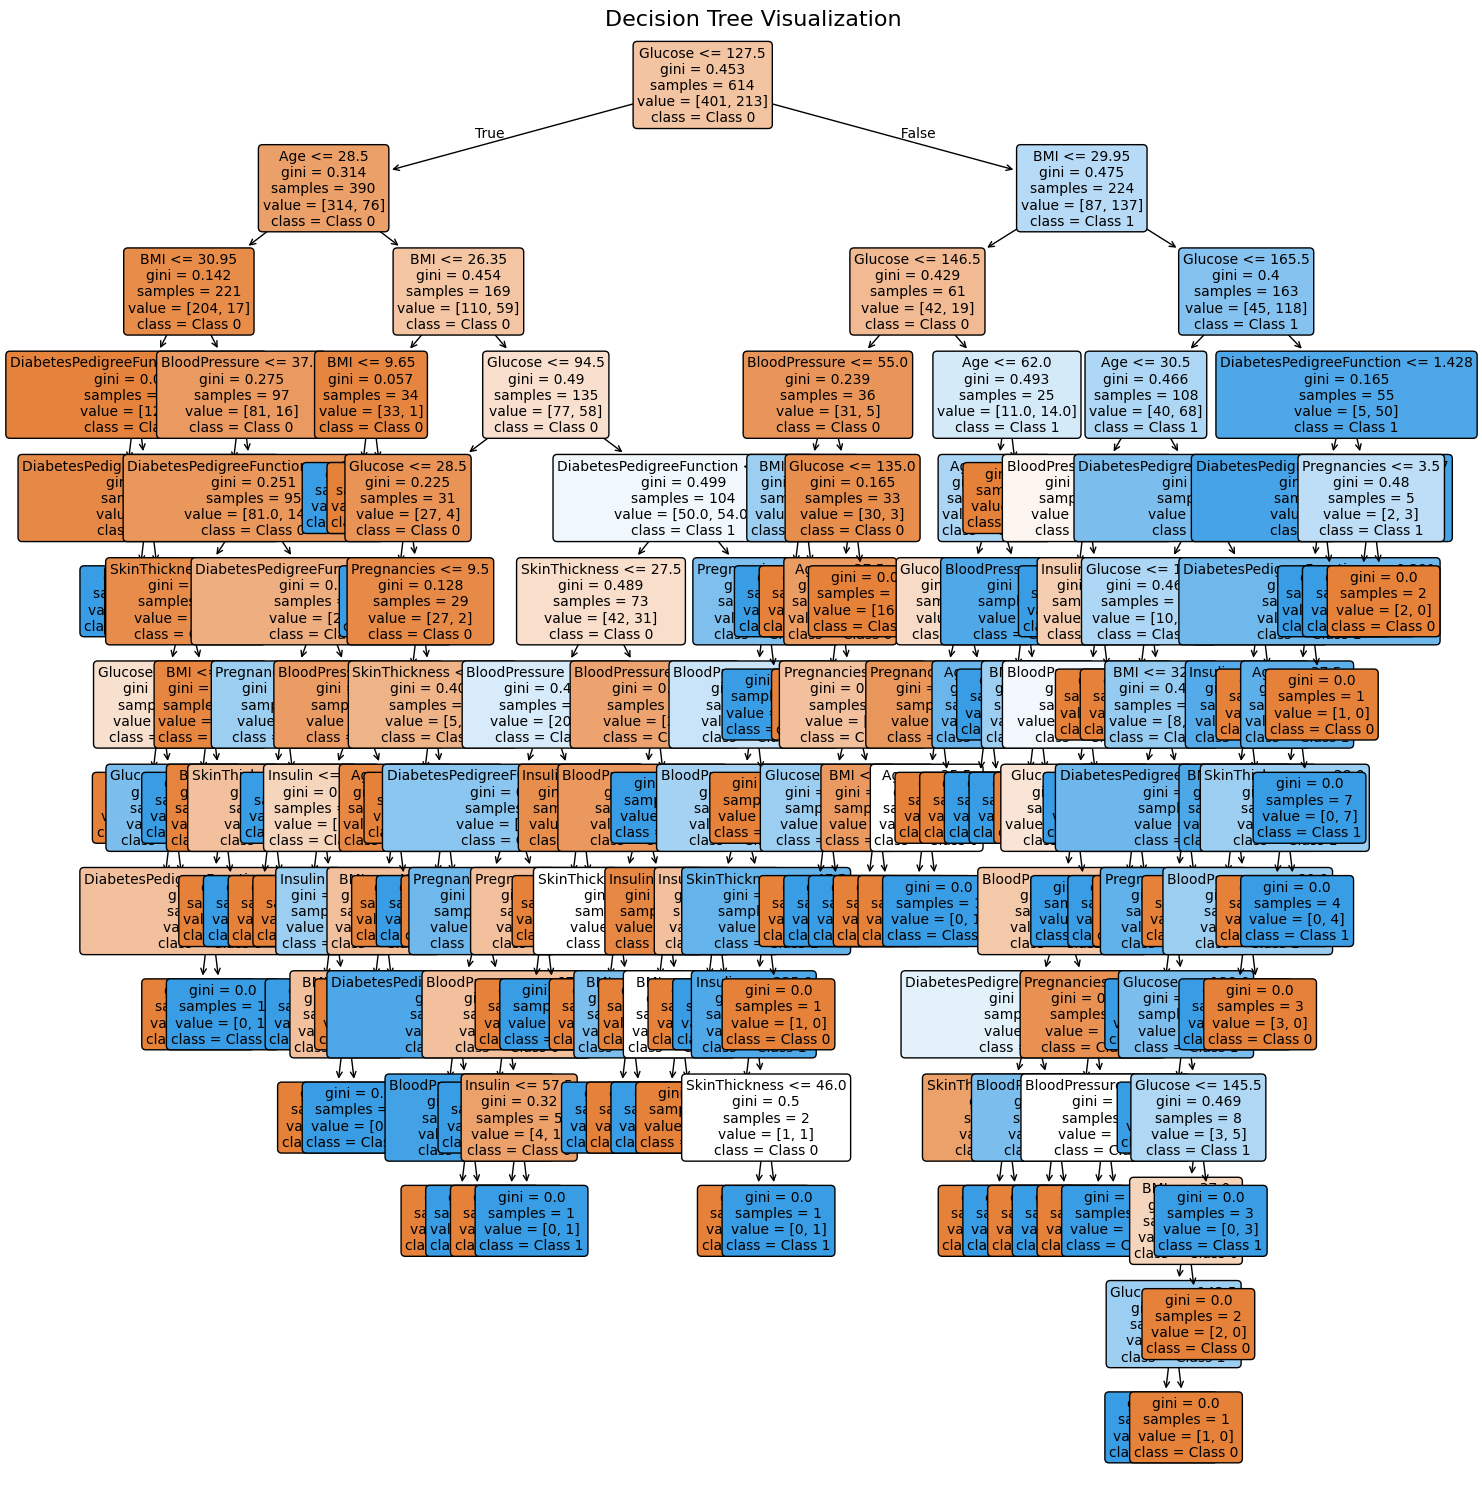

In [55]:
fig = plt.figure(figsize=(15, 15), dpi=100)

tree.plot_tree(model, 
               feature_names=X_train.columns,  
               class_names=["Class 0", "Class 1", "Class 2"],  
               filled=True, 
               rounded=True, 
               fontsize=10)  

plt.title("Decision Tree Visualization", fontsize=16)

# Show the plot
plt.tight_layout() 
plt.show()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [57]:
accuracy_score(y_test, y_pred)

0.7467532467532467

In [58]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(estimator=model, 
                    param_grid=hyperparams, 
                    scoring="accuracy", 
                    cv=10,  
                    n_jobs=-1,  
                    verbose=1)  


grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.757218402961396


In [59]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

grid.fit(X_train, y_train)

print("Best hyperparameters found: ")
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best cross-validation score: {grid.best_score_:.4f}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best hyperparameters found: 
  criterion: entropy
  max_depth: 5
  min_samples_leaf: 4
  min_samples_split: 2
Best cross-validation score: 0.7572


In [60]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [61]:
model = DecisionTreeClassifier(criterion="entropy", 
                               max_depth=5, 
                               min_samples_leaf=4, 
                               min_samples_split=2, 
                               random_state=42)

model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [62]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [63]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [64]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))